# Question_1-1-3_Multiclass_Ridge

Janet Matsen

Code notes:
* Indivudal regressions are done by instinces of `RidgeRegression`, defined in `rige_regression.py`.
    * `RidgeRegression` gets some methods from `ClassificationBase`, defined in `classification_base.py`.
* The class `HyperparameterExplorer` in `hyperparameter_explorer` is used to tune hyperparameters on training data.


In [1]:
import numpy as np
import matplotlib as mpl
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

from mnist import MNIST  # public package for making arrays out of MINST data.

In [2]:
import sys
sys.path.append('../code/')

In [3]:
from ridge_regression import RidgeMulti
from hyperparameter_explorer import HyperparameterExplorer

In [4]:
from mnist_helpers import mnist_training, mnist_testing

In [5]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3

### Prepare MNIST training data

In [6]:
train_X, train_y = mnist_training()
test_X, test_y = mnist_testing()

[    0     1     2 ..., 59997 59998 59999]
[   0    1    2 ..., 9997 9998 9999]


## Explore hyperparameters before training model on all of the training data.

In [7]:
hyper_explorer = HyperparameterExplorer(X=train_X, y=train_y, 
                                        model=RidgeMulti, 
                                        validation_split=0.1, score_name = 'training RMSE', 
                                        use_prev_best_weights=False,
                                        test_X=test_X, test_y=test_y)

6000 of 60000 points from training are reserved for validation
variances of all training data: 8.347744528888887
variances of split-off training & validation data: 8.346716212620029, 8.354324333333334


In [ ]:
hyper_explorer.train_model(lam=1e10, verbose=False)

In [ ]:
hyper_explorer.train_model(lam=1e+08, verbose=False)
hyper_explorer.train_model(lam=1e+07, verbose=False)

In [8]:
hyper_explorer.train_model(lam=1e+06, verbose=False)

training RMSE:0.6257551354903268


In [ ]:
hyper_explorer.train_model(lam=1e5, verbose=False)
hyper_explorer.train_model(lam=1e4, verbose=False)
hyper_explorer.train_model(lam=1e03, verbose=False)
hyper_explorer.train_model(lam=1e2, verbose=False)

In [9]:
hyper_explorer.train_model(lam=1e1, verbose=False)

training RMSE:0.6248560063778434


In [ ]:
hyper_explorer.train_model(lam=1e0, verbose=False)
hyper_explorer.train_model(lam=1e-1, verbose=False)
hyper_explorer.train_model(lam=1e-2, verbose=False)
hyper_explorer.train_model(lam=1e-3, verbose=False)
hyper_explorer.train_model(lam=1e-4, verbose=False)
hyper_explorer.train_model(lam=1e-5, verbose=False)

In [10]:
hyper_explorer.summary

,# nonzero weights,lambda,model number,training (0/1 loss)/N,training 0/1 loss,training RMSE,training SSE,weights,validation (0/1 loss)/N,validation 0/1 loss,validation RMSE,validation SSE
0,3,1000000.0,1,0.149093,8051,0.625755,21144.752438,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.151333,908,0.632408,2399.638236
1,445,10.0,2,0.148648,8027,0.624856,21084.031550,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.153000,918,0.635386,2422.293121


../code/hyperparameter_explorer.py:185: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  plot_data = df.sort(x)


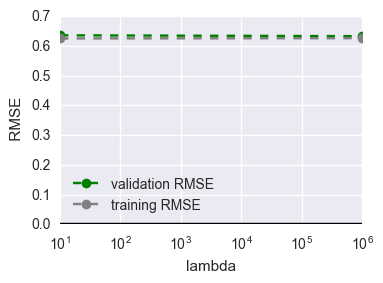

In [11]:
hyper_explorer.plot_fits()

In [ ]:
t = time.localtime(time.time())

hyper_explorer.plot_fits(filename = "Q-1-1-3_val_and_train_RMSE_{}-{}".format(t.tm_mon, t.tm_mday))

In [ ]:
hyper_explorer.plot_fits(ylim=(.6,.7),
                         filename = "Q-1-1-3_val_and_train_RMSE_zoomed_in{}-{}".format(t.tm_mon, t.tm_mday))

In [ ]:
hyper_explorer.best('score')

In [ ]:
hyper_explorer.best('summary')

In [ ]:
hyper_explorer.best('best score')

In [13]:
hyper_explorer.train_on_whole_training_set()

getting best model.
{'training SSE': [21144.752437995936], 'lambda': [1000000.0], 'weights': [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])], 'training RMSE': [0.6257551354903268], 'training 0/1 loss': [8051], 'training (0/1 loss)/N': [0.14909259259259258], '# nonzero weights': [3]}


In [14]:
hyper_explorer.final_model.results_row()

{'# nonzero weights': [3],
 'lambda': [1000000.0],
 'training (0/1 loss)/N': [0.14931666666666665],
 'training 0/1 loss': [8959],
 'training RMSE': [0.62642358770304951],
 'training SSE': [23544.39067384561],
 'weights': [array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]}

In [15]:
hyper_explorer.evaluate_test_data()

                                                                   0
# nonzero weights                                                  3
lambda                                                         1e+06
test (0/1 loss)/N                                             0.1459
test 0/1 loss                                                   1459
test RMSE                                                   0.627847
test SSE                                                     3941.92
weights            [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
